# Lab 4
Alon Hillel-Tuch (ah5647), Md Sarker (mbs9284), Copeland Myrie (cm5761), Marty Trice(mgt9613)

In [1]:
Group = "15"
Course = "ISSEM"
Lab = "Lab 4"
print("Group:"+Group,Lab, "Course:"+Course)

Group:15 Lab 4 Course:ISSEM


## Writing Tasks

As per Professor, see separate Word/PDF submission

## Coding Tasks

In [ ]:
# run one to setup environment properly if you do not have hvac installed
!rm -rf myenv
!python3 -m venv myenv
!source myenv/bin/activate
!myenv/bin/pip install --upgrade pip
!myenv/bin/pip install ipykernel
!myenv/bin/pip install hvac
!myenv/bin/python3 -m ipykernel install --user --name=myenv



In [ ]:
# Only run if you need hashicorp Vault setup

import getpass
import os

# password capture
password = getpass.getpass("Enter your password: ")

command = "sudo -S apt-get update"
os.system('echo {} | {}'.format(password, command))

password = getpass.getpass("Enter your password again: ")

command = "sudo -S apt update && sudo -S apt install gpg"
os.system('echo {} | {}'.format(password, command))

password = getpass.getpass("Enter your password once more: ")

command = "wget -O- https://apt.releases.hashicorp.com/gpg | sudo -S gpg --dearmor -o /usr/share/keyrings/hashicorp-archive-keyring.gpg"
os.system('echo {} | {}'.format(password, command))

command = "sudo -S gpg --no-default-keyring --keyring /usr/share/keyrings/hashicorp-archive-keyring.gpg --fingerprint"
os.system('echo {} | {}'.format(password, command))

password = getpass.getpass("Enter your password again: ")

command = 'echo "deb [arch=$(dpkg --print-architecture) signed-by=/usr/share/keyrings/hashicorp-archive-keyring.gpg] https://apt.releases.hashicorp.com $(lsb_release -cs) main" | sudo -S tee /etc/apt/sources.list.d/hashicorp.list'
os.system('echo {} | {}'.format(password, command))

password = getpass.getpass("Enter your password: ")

command = "sudo -S apt update"
os.system('echo {} | {}'.format(password, command))

password = getpass.getpass("Enter your password: ")

command = "sudo -S apt install consul"
os.system('echo {} | {}'.format(password, command))

password = getpass.getpass("Enter your password: ")

command = "sudo -S apt install vault"
os.system('echo {} | {}'.format(password, command))


In [1]:
# Run in terminal or separate thread

import subprocess
import threading

def run_command():
    command = "vault server -dev -dev-root-token-id=dev-only-token"
    subprocess.run(command, shell=True)

# Create a separate thread for running the command
thread = threading.Thread(target=run_command)

# Start the thread
thread.start()

# Rest of the notebook code continues running...

==> Vault server configuration:

             Api Address: http://127.0.0.1:8200
                     Cgo: disabled
         Cluster Address: https://127.0.0.1:8201
   Environment Variables: CLICOLOR, CLICOLOR_FORCE, COLORTERM, DBUS_SESSION_BUS_ADDRESS, DBUS_STARTER_ADDRESS, DBUS_STARTER_BUS_TYPE, DEBUGINFOD_URLS, DESKTOP_SESSION, DISPLAY, FORCE_COLOR, GDMSESSION, GIT_PAGER, GNOME_DESKTOP_SESSION_ID, GNOME_SETUP_DISPLAY, GNOME_SHELL_SESSION_MODE, GNOME_TERMINAL_SCREEN, GNOME_TERMINAL_SERVICE, GODEBUG, GOTRACEBACK, GTK_MODULES, HOME, IM_CONFIG_PHASE, JPY_PARENT_PID, LANG, LESSCLOSE, LESSOPEN, LOGNAME, LS_COLORS, MPLBACKEND, PAGER, PATH, PWD, PYDEVD_USE_FRAME_EVAL, QT_ACCESSIBILITY, QT_IM_MODULE, SESSION_MANAGER, SHELL, SHLVL, SSH_AGENT_LAUNCHER, SSH_AUTH_SOCK, SYSTEMD_EXEC_PID, TERM, USER, USERNAME, VTE_VERSION, WAYLAND_DISPLAY, XAUTHORITY, XDG_CONFIG_DIRS, XDG_CURRENT_DESKTOP, XDG_DATA_DIRS, XDG_MENU_PREFIX, XDG_RUNTIME_DIR, XDG_SESSION_CLASS, XDG_SESSION_DESKTOP, XDG_SESSION_TYPE, XMO

2023-07-17T19:45:28.160-0400 [INFO]  proxy environment: http_proxy="" https_proxy="" no_proxy=""
2023-07-17T19:45:28.161-0400 [WARN]  no `api_addr` value specified in config or in VAULT_API_ADDR; falling back to detection if possible, but this value should be manually set
2023-07-17T19:45:28.162-0400 [INFO]  core: Initializing version history cache for core
2023-07-17T19:45:28.163-0400 [INFO]  core: security barrier not initialized
2023-07-17T19:45:28.163-0400 [INFO]  core: security barrier initialized: stored=1 shares=1 threshold=1
2023-07-17T19:45:28.167-0400 [INFO]  core: post-unseal setup starting
2023-07-17T19:45:28.187-0400 [INFO]  core: loaded wrapping token key
2023-07-17T19:45:28.187-0400 [INFO]  core: successfully setup plugin catalog: plugin-directory=""
2023-07-17T19:45:28.187-0400 [INFO]  core: no mounts; adding default mount table
2023-07-17T19:45:28.189-0400 [INFO]  core: successfully mounted: type=cubbyhole version="v1.14.0+builtin.vault" path=cubbyhole/ namespace="ID: 

Our 'token' will not be stored in, here is an example of how we can store it in the OS environment, depending on the hardware environment we can use the TPM or other cryptographic engine as well, as well as multiple authentication processes.

We are setting in our hashicorp vault our password to verify

In [2]:
# We are not just storing as an environmental variable but also encrypted with AES

import os
import platform
from cryptography.fernet import Fernet

# OS specific set
def set_environment_variable(variable_name, value):
    current_os = platform.system()
    if current_os == 'Windows': #if we ever want to work on OS nuanced commands, this func will permit
        os.environ[variable_name] = value
    else:
        os.environ[variable_name] = value

# Encrypt the value using AES encryption
def encrypt_value(key, value):
    cipher_suite = Fernet(key)
    encrypted_value = cipher_suite.encrypt(value.encode()).decode()
    return encrypted_value

# Decrypt the encrypted value using AES decryption
def decrypt_value(key, encrypted_value):
    cipher_suite = Fernet(key)
    decrypted_value = cipher_suite.decrypt(encrypted_value.encode()).decode()
    return decrypted_value

# Generate a random encryption key
def generate_encryption_key():
    return Fernet.generate_key()

# Example usage (this is the variable storing the key)
# For demonstration purposes, we can work on better key storage/retrieval
encryption_key = generate_encryption_key()

# Encrypt the values
encrypted_token = encrypt_value(encryption_key, 'dev-only-token')
encrypted_path = encrypt_value(encryption_key, 'my-secret-password')
encrypted_ip = encrypt_value(encryption_key, '127.0.0.1')
encrypted_port = encrypt_value(encryption_key, '8200')

# Set the encrypted values as environment variables
set_environment_variable('SET_TOKEN', encrypted_token)
set_environment_variable('SET_PATH', encrypted_path)
set_environment_variable('SET_IP', encrypted_ip)
set_environment_variable('SET_PORT', encrypted_port)

print("Environmental variables setup successfully.")


Environmental variables setup successfully.


In [4]:
# Copyright (c) HashiCorp, Inc.
# SPDX-License-Identifier: MPL-2.0
# modified by Group 15 for ISSEM Lab 4

import hvac
import sys

# Authentication
client = hvac.Client(
    url='http://'+decrypt_value(encryption_key,os.environ.get('SET_IP'))+':'+decrypt_value(encryption_key,os.environ.get('SET_PORT')),
    token=decrypt_value(encryption_key,os.environ.get('SET_TOKEN'))
)

# Writing a secret
create_response = client.secrets.kv.v2.create_or_update_secret(
    path='my-secret-password',
    secret=dict(password=encrypt_value(encryption_key,'!Q#E%T&U8i6y4r2w')) # Again, this is example code of how to set the password in our Vault
)

print('Secret written successfully.')

Secret written successfully.


In [3]:
# Proof of environmental Variables properly stored
# Again we would never do this in production, this is for assignment proof

import os
print("OS Environment:\n")
print("Proof Encrypted - SET_TOKEN: ",os.environ.get('SET_TOKEN'))
print("Proof Encrypted - SET_PATH: ",os.environ.get('SET_PATH'))
print("Proof Encrypted - SET_IP: ",os.environ.get('SET_IP'))
print("Proof Encrypted - SET_PORT: ",os.environ.get('SET_PORT'))
print ("\nDecrypt the values:")
print("Proof Decrypted - SET_TOKEN: ",decrypt_value(encryption_key,os.environ.get('SET_TOKEN')))
print("Proof Decrypted - SET_PATH: ",decrypt_value(encryption_key,os.environ.get('SET_PATH')))
print("Proof Decrypted - SET_IP: ",decrypt_value(encryption_key,os.environ.get('SET_IP')))
print("Proof Decrypted - SET_PORT: ",decrypt_value(encryption_key,os.environ.get('SET_PORT')))

OS Environment:

Proof Encrypted - SET_TOKEN:  gAAAAABktetr1cGqWlkfTc1izjMSPTIhiC5_TU3gtroDYsdc6NL5StxongjUGCYu-HPq2BPsuoEHkJQX4EGCa1NKbB3BjZhTTw==
Proof Encrypted - SET_PATH:  gAAAAABktetrYsIn4Zo45nSurGfBNvizFewlZANlTA_B2Wp0rtPBndvR4XO_WUC-2ZYlAXBJvz7uGBkPx1UuPOUbyaWu27xsjS956KX_A-o6KasSh1pMyQg=
Proof Encrypted - SET_IP:  gAAAAABktetrTTbVXSTq8u6f1X5COYh71dlFnfXgtR9YOiMAUu4WFKAPb4eeZ2kIbrrJJ_ZyJ7bWSeaGBhNdb8v0lHtJYCmVOA==
Proof Encrypted - SET_PORT:  gAAAAABktetrPELo3ZMpM6akJ8BYrg-7pMT8dPoI3bbCztqiw4vyPhNwOts5rfYvZZopaSzr_5J2xfXo0AO7mbd7yrEno2FeXA==

Decrypt the values:
Proof Decrypted - SET_TOKEN:  dev-only-token
Proof Decrypted - SET_PATH:  my-secret-password
Proof Decrypted - SET_IP:  127.0.0.1
Proof Decrypted - SET_PORT:  8200


### Discussion on storing as an OS Environmental Variable for below Vulnerabilities

We recognize that Storing sensitive variables as environment variables rather than hardcoding them directly in code can improve security, but it is not a perfect solution. 

Pros:

* By storing sensitive variables as environment variables, we are separating he secrets from the codebase. Reducing the risk of accidental exposure of sensitive information, such as when sharing or publishing code.
* If the source code of an application is compromised, storing sensitive information as environment variables can limit the potential damage. The attacker would need to gain access to the environment where the application is deployed to retrieve the environment variables. Obviously this Jupyter Notebook is a Homework submission, and not production.

Cons:

* Environment variables are stored at the operating system level, which means that anyone with access to the environment can potentially view or modify them. If an attacker gains unauthorized access to the server or the user account running the application, they can access the environment variables.
* Environment variables are typically plain text, lacking built-in encryption. This means that if an attacker gains access to the environment, they can easily read the values of the variables. Encryption mechanisms must be implemented separately to protect the values stored in environment variables.
* Environment variables lack robust auditing capabilities. If a security breach occurs, it can be challenging to trace back who accessed or modified the environment variables. We strongly believe <b> the incubator should have a audit trail/monitor/logging system </b>.
* Storing sensitive information as environment variables doesn't protect against runtime vulnerabilities, such as memory leaks or injection attacks. 

If we were to further develop we would do the following:

* Enforce strict access controls at the operating system level
* Implement monitoring and logging mechanisms to track access and modifications to the environment variables. 
* Implement secure deployment practices, such as secure configuration management, secure credential handling, and regularly updating and patching the underlying software and systems. Hashicorp was a first step here. 

### Encrypting TCP packets

Note that we can encrypt the packets being sent to and from the server using a combination of certificates and other solutions. A TLS server could help here. This is what we would like to do in a future version of the assignment. However, for the purposes of this assignment we use a singular encryption key stored in the Jupyter Environments Python Kernel Space. THIS IS NOT IDEAL, AND NOT SECURE. However, we are purely doing so for demonstration purposes. We made the decision to <b>also encrypt all messages sent to server</b>. Knowing what messages are being sent, even if an error code, is still critical information that may inform an attacker that is sniffing packets. 

<b>We print to terminal at different points in the code our proof of work for encryption of the various data fields</b>. We would NEVER do this in a production environment, and are only doing this for the assignment. We also provide Wireshark outputs below (pre and post). We also keyboardinterrupt our code snippets since production would not run within a Jupyter Notebook.

![alternative text](./unencrypted_into_vault.png)

![alternative text](./encrypted_into_vault.png)

### Vulnerability 1 - Password is Hardcoded

In the SampleNetworkClient.py script, the author hardcodes the password ("!Q#E%T&U8i6y4r2w") in lines 56 & 67.

Best practice, when handling passwords, consists of storing credentials in an identity-based secrets and encryption management system such as Hashicorp Vault (vaultproject.io) for managing secrets.

There is no reference in the code to indicate that the messages are being encrypted, which means not only is the password susceptible to an attacker, but so is the data  transferred between both the client and server.


---


 **Below are the following changes made to the code to remediate the vulnerability in question. Please note that after the removal of the hardcoded password (#2) and incorporating a call to Hashicorp (#4), the password no longer needs to be hardcoded to be reference.**
<br>1) Import both hvac, for Hashicorp Vault, and os, for OS environment set variables
<br>2) Remove the following (b"!Q#E%T&U8i6y4r2w") from the updateInfTemp and updateIncTemp class where the tokens are being set (self.infToken & self.incToken, respectively)
<br>3) Remove the password  variable being set when calling the Authenticate class
<br>4) Under the authenticate class, define host URL and credentials, then retrieve the password stored within the Hashicorp vault
<br>5) Before the password is retrieved and sent to the destination host, as part of the authenticate class, the password retrieved from Hashicorp Vault is encrypted, further securing the traffic from potential attacks, such as a Man in the Middle (MitM) attack.

/tmp/ipykernel_4143/3089353954.py:28: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  self.ani = animation.FuncAnimation(self.fig, self.updateInfTemp, interval=500)
/tmp/ipykernel_4143/3089353954.py:29: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  self.ani2 = animation.FuncAnimation(self.fig, self.updateIncTemp, interval=500)


PROOF: Decrypted URL:  http://127.0.0.1:8200
PROOF: Decrypted Token:  dev-only-token


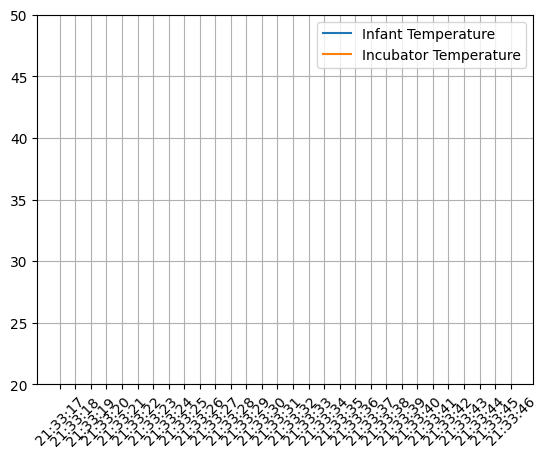

PROOF: encrypted password:  gAAAAABktet7NxPPRkH83gYFOrTEzX0qZqvu-lbvzyau08gXP8mpJzSR5Sxd2cnAY50x45Zqz7aN3NyO1jXs-JKBUhkN2mMd6hD7OpojbpDNBvfry1M9OcU=
PROOF: decrypted password:  !Q#E%T&U8i6y4r2w
PROOF - MESSAGE SENT:  (b'gAAAAABktev7CHztPCJFlVwnrAjx3-GtDE4XhvlJ8oq6ulAly_dylsoKpP5Ngpd4wCHs8DdrshdEyt-xf3ZEWLgbxh3s3P6CMKrhTxMAGyZqnH_3NIGTY5I=', ('127.0.0.1', 23456))


KeyboardInterrupt: 

In [5]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
import math
import socket
import hvac
import os
# Run in terminal or separate thread


class SimpleNetworkClient :
    def __init__(self, port1, port2) :
        self.fig, self.ax = plt.subplots()
        now = time.time()
        self.lastTime = now
        self.times = [time.strftime("%H:%M:%S", time.localtime(now-i)) for i in range(30, 0, -1)]
        self.infTemps = [0]*30
        self.incTemps = [0]*30
        self.infLn, = plt.plot(range(30), self.infTemps, label="Infant Temperature")
        self.incLn, = plt.plot(range(30), self.incTemps, label="Incubator Temperature")
        plt.xticks(range(30), self.times, rotation=45)
        plt.ylim((20,50))
        plt.legend(handles=[self.infLn, self.incLn])
        self.infPort = port1
        self.incPort = port2

        self.infToken = None
        self.incToken = None

        self.ani = animation.FuncAnimation(self.fig, self.updateInfTemp, interval=500)
        self.ani2 = animation.FuncAnimation(self.fig, self.updateIncTemp, interval=500)

        self.url='http://'+decrypt_value(encryption_key,os.environ.get('SET_IP'))+':'+decrypt_value(encryption_key,os.environ.get('SET_PORT'))
        print("PROOF: Decrypted URL: ", self.url) # THIS WOULD NEVER BE IN PRODUCTION, THIS IS FOR ASSIGNMENT
        self.set_token = decrypt_value(encryption_key,os.environ.get('SET_TOKEN')) # THIS WOULD NEVER BE IN PRODUCTION, THIS IS FOR ASSIGNMENT
        print("PROOF: Decrypted Token: ",self.set_token)
    def updateTime(self) :
        now = time.time()
        if math.floor(now) > math.floor(self.lastTime) :
            t = time.strftime("%H:%M:%S", time.localtime(now))
            self.times.append(t)
            #last 30 seconds of of data
            self.times = self.times[-30:]
            self.lastTime = now
            plt.xticks(range(30), self.times,rotation = 45)
            plt.title(time.strftime("%A, %Y-%m-%d", time.localtime(now)))

    def getTemperatureFromPort(self, p, tok) :
        s = socket.socket(family=socket.AF_INET, type=socket.SOCK_DGRAM)
        s.sendto(b"%s;GET_TEMP" % tok, (decrypt_value(encryption_key,os.environ.get('SET_IP')), p))
        msg, addr = s.recvfrom(1024)
        m = msg.decode("utf-8")
        return (float(m))

    def authenticate(self, p) :
        #Authenticate with Hashicorp Vault
        client = hvac.Client(url=self.url, token=self.set_token,)
        #Read password from Hashicorp Vault
        read_response = client.secrets.kv.v2.read_secret_version(path=decrypt_value(encryption_key,os.environ.get('SET_PATH')),raise_on_deleted_version=True)
        password = read_response['data']['data']['password']
        print("PROOF: encrypted password: ", password) # THIS WOULD NEVER BE IN PRODUCTION, THIS IS FOR ASSIGNMENT
        password = decrypt_value(encryption_key,password)
        print("PROOF: decrypted password: ", password) # THIS WOULD NEVER BE IN PRODUCTION, THIS IS FOR ASSIGNMENT
        
        s = socket.socket(family=socket.AF_INET, type=socket.SOCK_DGRAM)
        message = encrypt_value(encryption_key,password).encode("utf-8"), (decrypt_value(encryption_key,os.environ.get('SET_IP')), p)
        print("PROOF - MESSAGE SENT: ",message)  # THIS WOULD NEVER BE IN PRODUCTION, THIS IS FOR ASSIGNMENT
        s.sendto(encrypt_value(encryption_key,password).encode("utf-8"), (decrypt_value(encryption_key,os.environ.get('SET_IP')), p) )
        msg, addr = s.recvfrom(1024) # This will crash unless server is running (forcibly close)
        return msg.strip()

    def updateInfTemp(self, frame) :
        self.updateTime()
        if self.infToken is None : #not yet authenticated
            self.infToken = self.authenticate(self.infPort)

        self.infTemps.append(self.getTemperatureFromPort(self.infPort, self.infToken)-273)
        #self.infTemps.append(self.infTemps[-1] + 1)
        self.infTemps = self.infTemps[-30:]
        self.infLn.set_data(range(30), self.infTemps)
        return self.infLn,

    def updateIncTemp(self, frame) :
        self.updateTime()
        if self.incToken is None : #not yet authenticated
            self.incToken = self.authenticate(self.incPort)

        self.incTemps.append(self.getTemperatureFromPort(self.incPort, self.incToken)-273)
        #self.incTemps.append(self.incTemps[-1] + 1)
        self.incTemps = self.incTemps[-30:]
        self.incLn.set_data(range(30), self.incTemps)
        return self.incLn,

snc = SimpleNetworkClient(23456, 23457)

plt.grid()
plt.show()
snc.authenticate(23456) # Note we will see an error because the server is not running

### Vulnerability 2

There are numerous vulnerabilities we discussed in Lab 3. We then concluded to mitigate these vulnerabilities we can incorporate measures such as a token expiration period (removing tokens automatically after a predefined period of time), limiting the number of active tokens during a specified period of time (minimizing the impact of a DoS), or checking if a user already has a valid token and replacing the existing one vs. generating a new token would help drastically minimize potential impact.

An alert monitor or logging system should be implemented whenever we have an 'event' such as a break of the loop, or too many tokens being created.

##### SmartNetworkThermometer class

*   <b>Token Expiration and usage abuse</b>

  We are going to import from datetime 'datetime' and 'timedelta'. Allowing us to build in a token expiration time like so (for 180 minutes): 'expiration_time = datetime.now() + timedelta(minutes=180)'

  We implement the expiration time within the processCommands function.  180 minutes may not be appropriate, in our final code we will access it as a variable of type integer for easy modification.

  We also need to handle the risk of continuos growth of the token list. After receiving a message, we first remove any expired tokens from the self.tokens dictionary by comparing the current time with the expiration times.

  Then, if the number of tokens in the list exceeds a certain threshold (e.g., 20), we reject new tokens until the number of tokens decreases below the threshold. We add a condition to check the length of the self.tokens dictionary and handle the rejection of new tokens accordingly.

*   <b>Hard coded token</b>

  Considering we are using Python, it is particularly easy to lookup the token. We should be using a credential management solution here. In this solution we store the initial token as an environmental variable, and the password in a Hashicorp vault, we have our authenticate() function the hashicorp Client tasks. However, in a production environment we may make use on additionala authentication controls such as an employee ID badge, and password.


<u>Additional concerns</u>:

*   <b>Thread-safety for token access</b> - Resolution: Add appropriate locks or synchronization mechanisms when accessing and modifying the self.tokens dictionary in the SmartNetworkThermometer class to ensure thread safety.
*   <b>Dictionary access error self.tokens[]</b> - Resolution: In the processCommands method of the SmartNetworkThermometer class, replace self.tokens[token] with self.tokens.get(token) to avoid a potential KeyError when accessing the token. Using self.tokens.get(token) will return None if the token does not exist in the dictionary, preventing the KeyError.
*   <b>Infinite loop</b> - Resolution: Modify the run method of the SmartNetworkThermometer class to include a condition for breaking out of the loop when the thread is interrupted or stopped.  We add a check to break out of the loop when the thread is stopped or interrupted and implement a backup verification. The loop in the run() method will be terminated when the thread is interrupted or stopped, allowing the thread to exit gracefully

##### SimpleClient class

This is the exact same function from SampleClient.py, we have extracted this class to it's own .py file, for ease and consistency of maintenance and versioning. Much like we import infinc, we will do the same for simpleClient

/media/rock/30DC-DF6B/simpleclient.py:22: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  self.ani = animation.FuncAnimation(self.fig, self.updateInfTemp, interval=500)
/media/rock/30DC-DF6B/simpleclient.py:23: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  self.ani2 = animation.FuncAnimation(self.fig, self.updateIncTemp, interval=500)


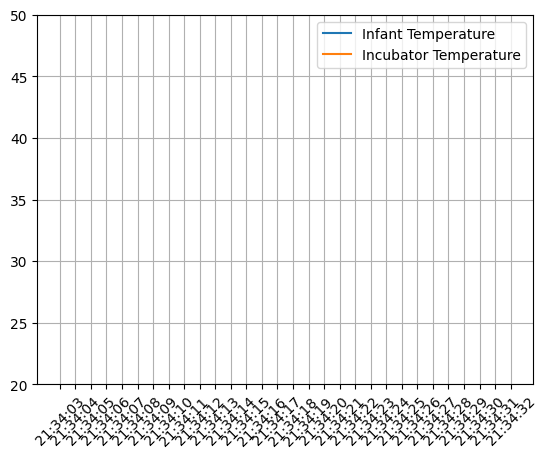

In [6]:
import threading
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import time
import math
import socket
import fcntl
import os
import errno
import random
import string

from datetime import datetime, timedelta

from simpleclient import SimpleClient # importing simpleclient instead of duplicating code
import infinc
import hvac # hashicorp

class SmartNetworkThermometer(threading.Thread):
    open_cmds = ["AUTH", "LOGOUT"]
    prot_cmds = ["SET_DEGF", "SET_DEGC", "SET_DEGK", "GET_TEMP", "UPDATE_TEMP"]

    def __init__(self, source, updatePeriod, port):
        threading.Thread.__init__(self, daemon=True)
        self.source = source
        self.updatePeriod = updatePeriod
        self.curTemperature = 0
        self.updateTemperature()
        self.tokens = []
        self.expiration_minutes = 180 # modifiable as appropriate

        self.serverSocket = socket.socket(family=socket.AF_INET, type=socket.SOCK_DGRAM)
        self.serverSocket.bind((decrypt_value(encryption_key,os.environ.get('SET_IP')), port))
        fcntl.fcntl(self.serverSocket, fcntl.F_SETFL, os.O_NONBLOCK)

        self.deg = "K"
        self.token_lock = threading.Lock() # Our threading lock for token access
        self.stopped = threading.Event()  # Event to indicate whether the thread should stop

        # hashicorp credentials
        self.url='http://'+decrypt_value(encryption_key,os.environ.get('SET_IP'))+':'+decrypt_value(encryption_key,os.environ.get('SET_PORT'))
        # Retrieve the token from the environment variable
        self.set_token = decrypt_value(encryption_key,os.environ.get('SET_TOKEN'))
        
    def stop(self): # threading stop/set function
        self.stopped.set()

    def setSource(self, source):
        self.source = source

    def setUpdatePeriod(self, updatePeriod):
        self.updatePeriod = updatePeriod

    def setDegreeUnit(self, s):
        self.deg = s
        if self.deg not in ["F", "K", "C"]:
            self.deg = "K"

    def updateTemperature(self):
        self.curTemperature = self.source.getTemperature()

    def getTemperature(self):
        if self.deg == "C":
            return self.curTemperature - 273
        if self.deg == "F":
            return (self.curTemperature - 273) * 9 / 5 + 32

        return self.curTemperature

    def authenticate(self) :
        #Authenticate with Hashicorp Vault
        client = hvac.Client(url=self.url, token=self.set_token,)
        #Read password from Hashicorp Vault
        read_response = client.secrets.kv.v2.read_secret_version(path=decrypt_value(encryption_key,os.environ.get('SET_PATH')),raise_on_deleted_version=True)
        password = decrypt_value(encryption_key,read_response['data']['data']['password'])
        return password

def processCommands(self, msg, addr):
    cmds = msg.split(';')
    for c in cmds:
        cs = c.split(' ')
        if len(cs) == 2:  # should be either AUTH or LOGOUT
            if cs[0] == "AUTH":
                # Reading our secret
                password = self.authenticate()
                if cs[1] == password:
                    with self.token_lock:
                        token = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for _ in range(16))
                        expiration_time = datetime.now() + timedelta(minutes=self.expiration_minutes)
                        # Set token expiration time
                        self.tokens[token] = expiration_time
                    self.serverSocket.sendto(encrypt_value(encryption_key,token).encode("utf-8"), addr)
            elif cs[0] == "LOGOUT":
                with self.token_lock: # our lock implemented
                    token = cs[1]
                    if self.tokens.get(token): # using get to prevent keyerrors
                        del self.tokens[token]
            else:  # unknown command
                self.serverSocket.sendto(encrypt_value(encryption_key,"Invalid Command\n").encode("utf-8"), addr)
        elif c == "SET_DEGF":
            self.deg = "F"
        elif c == "SET_DEGC":
            self.deg = "C"
        elif c == "SET_DEGK":
            self.deg = "K"
        elif c == "GET_TEMP":
            self.serverSocket.sendto(encrypt_value(encryption_key,"{}\n".format(self.getTemperature())).encode("utf-8"), addr)
        elif c == "UPDATE_TEMP":
            self.updateTemperature()
        elif c:
            self.serverSocket.sendto(encrypt_value(encryption_key,"Invalid Command\n").encode("utf-8"), addr)

    def run(self):
        MAX_TOKENS = 20  # Maximum number of tokens allowed
        while not self.stopped.is_set(): # help with infinite loop risk and race conditions
            try:
                # Remove expired tokens
                with self.token_lock:
                    current_time = datetime.now()
                    expired_tokens = [token for token, expiration_time in self.tokens.items() if expiration_time <= current_time]
                    for token in expired_tokens:
                        del self.tokens[token]

                msg, addr = self.serverSocket.recvfrom(1024)
                msg = msg.decode("utf-8").strip()
                msg = decrypt_value(encryption_key,msg) #decrypting the received message
                cmds = msg.split(' ')
                if len(cmds) == 1:  # protected commands case
                    semi = msg.find(';')
                    if semi != -1:  # if we found the semicolon
                        with self.token_lock:
                            if msg[:semi] in self.tokens:  # if it's a valid token
                                self.processCommands(msg[semi + 1:], addr)
                            else:
                                self.serverSocket.sendto(encrypt_value(encryption_key,"Bad Token\n").encode("utf-8"), addr)
                    else:
                        self.serverSocket.sendto(encrypt_value(encryption_key,"Bad Command\n").encode("utf-8"), addr)
                elif len(cmds) == 2:
                    if cmds[0] in self.open_cmds:  # if it's AUTH or LOGOUT
                        with self.token_lock:
                            if len(self.tokens) >= MAX_TOKENS: #check if we have reached the maximum number of permitted tokens
                                self.serverSocket.sendto(encrypt_value(encryption_key,"Too many tokens\n").encode("utf-8"), addr)
                            else:
                                self.processCommands(msg, addr)
                    else:
                        self.serverSocket.sendto(encrypt_value(encryption_key,"Authenticate First\n").encode("utf-8"), addr)
                else:
                    self.serverSocket.sendto(encrypt_value(encryption_key,"Bad Command\n").encode("utf-8"), addr)

            except IOError as e:
                if e.errno == errno.EWOULDBLOCK:
                    # do nothing
                    pass
                else:
                    # do nothing for now
                    pass

            self.updateTemperature()
            time.sleep(self.updatePeriod)
            if threading.currentThread().interrupted: # break out of the loop if the thread is interrupted. This check is used as a backup in case the interruption is not handled through the self.stopped event.
                break

# SimpleClient is now imported

UPDATE_PERIOD = .05 #in seconds
SIMULATION_STEP = .1 #in seconds

#create a new instance of IncubatorSimulator
bob = infinc.Human(mass = 8, length = 1.68, temperature = 36 + 273)
#bobThermo = infinc.SmartThermometer(bob, UPDATE_PERIOD)
bobThermo = SmartNetworkThermometer(bob, UPDATE_PERIOD, 23456)
bobThermo.start() #start the thread

inc = infinc.Incubator(width = 1, depth=1, height = 1, temperature = 37 + 273, roomTemperature = 20 + 273)
#incThermo = infinc.SmartNetworkThermometer(inc, UPDATE_PERIOD)
incThermo = SmartNetworkThermometer(inc, UPDATE_PERIOD, 23457)
incThermo.start() #start the thread

incHeater = infinc.SmartHeater(powerOutput = 1500, setTemperature = 45 + 273, thermometer = incThermo, updatePeriod = UPDATE_PERIOD)
inc.setHeater(incHeater)
incHeater.start() #start the thread

sim = infinc.Simulator(infant = bob, incubator = inc, roomTemp = 20 + 273, timeStep = SIMULATION_STEP, sleepTime = SIMULATION_STEP / 10)

sim.start()

sc = SimpleClient(bobThermo, incThermo)

plt.grid()
plt.show()


### Vulnerability 3 - Plaintext authentication token and authentication

Since the authenticate class transfers the tokens over the network without performing any encryption to secure the token value, the token value becomes vulnerable to exploits; there is no reference in the code to indicate that the messages are being encrypted.

Malicious characters can perform attacks, such as a Man in the Middle (MitM), to obtain the authentication token value, and attempt to send an authentication request, ultimately enabling unauthorized access to manipulate the temperature levels of the incubator.


---


 **Below are the following changes made to the code to remediate the vulnerability in question. Please note that in order to secure the authentication token and overall authentication, the password will not be sent as plaintext but rather encrypted before being sent across the network (#5) .**
<br>1) Import both hvac, for Hashicorp Vault, and os, for OS environment set variables
<br>2) Remove the following (b"!Q#E%T&U8i6y4r2w") from the updateInfTemp and updateIncTemp class where the tokens are being set (self.infToken & self.incToken, respectively)
<br>3) Remove the password  variable being set when calling the Authenticate class
<br>4) Under the authenticate class, define host URL and credentials, then retrieve the password stored within the Hashicorp vault
<br>5) Before the password is retrieved and sent to the destination host, as part of the authenticate class, the password retrieved from Hashicorp Vault is encrypted, further securing the traffic from potential attacks, such as a Man in the Middle (MitM) attack.

/tmp/ipykernel_4143/3072558999.py:28: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  self.ani = animation.FuncAnimation(self.fig, self.updateInfTemp, interval=500)
/tmp/ipykernel_4143/3072558999.py:29: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  self.ani2 = animation.FuncAnimation(self.fig, self.updateIncTemp, interval=500)


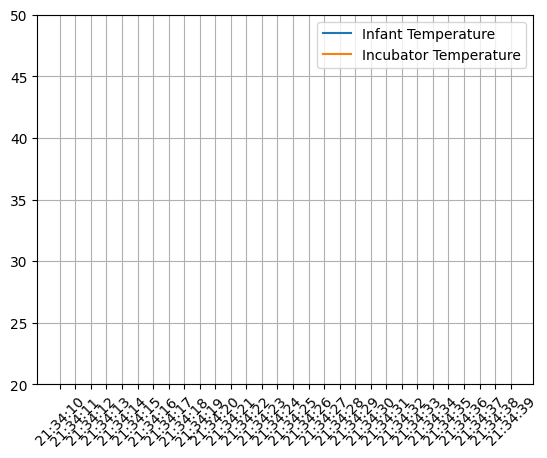

Proof of encryption : gAAAAABktet7NxPPRkH83gYFOrTEzX0qZqvu-lbvzyau08gXP8mpJzSR5Sxd2cnAY50x45Zqz7aN3NyO1jXs-JKBUhkN2mMd6hD7OpojbpDNBvfry1M9OcU=
Proof of decryption : !Q#E%T&U8i6y4r2w


KeyboardInterrupt: 

In [7]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
import math
import socket
import hvac
import os

class SimpleNetworkClient :
    def __init__(self, port1, port2) :
        self.fig, self.ax = plt.subplots()
        now = time.time()
        self.lastTime = now
        self.times = [time.strftime("%H:%M:%S", time.localtime(now-i)) for i in range(30, 0, -1)]
        self.infTemps = [0]*30
        self.incTemps = [0]*30
        self.infLn, = plt.plot(range(30), self.infTemps, label="Infant Temperature")
        self.incLn, = plt.plot(range(30), self.incTemps, label="Incubator Temperature")
        plt.xticks(range(30), self.times, rotation=45)
        plt.ylim((20,50))
        plt.legend(handles=[self.infLn, self.incLn])
        self.infPort = port1
        self.incPort = port2

        self.infToken = None
        self.incToken = None

        self.ani = animation.FuncAnimation(self.fig, self.updateInfTemp, interval=500)
        self.ani2 = animation.FuncAnimation(self.fig, self.updateIncTemp, interval=500)

        self.url='http://'+decrypt_value(encryption_key,os.environ.get('SET_IP'))+':'+decrypt_value(encryption_key,os.environ.get('SET_PORT'))
        self.set_token = decrypt_value(encryption_key,os.environ.get('SET_TOKEN'))

    def updateTime(self) :
        now = time.time()
        if math.floor(now) > math.floor(self.lastTime) :
            t = time.strftime("%H:%M:%S", time.localtime(now))
            self.times.append(t)
            #last 30 seconds of of data
            self.times = self.times[-30:]
            self.lastTime = now
            plt.xticks(range(30), self.times,rotation = 45)
            plt.title(time.strftime("%A, %Y-%m-%d", time.localtime(now)))

    def getTemperatureFromPort(self, p, tok) :
        s = socket.socket(family=socket.AF_INET, type=socket.SOCK_DGRAM)
        s.sendto(encrypt_value(encryption_key,"%s;GET_TEMP" % tok).encode("utf-8"), (decrypt_value(encryption_key,os.environ.get('SET_IP'), p)))
        msg, addr = s.recvfrom(1024)
        m = msg.decode("utf-8")
        return (float(m))

    def authenticate(self, p) :
        #Authenticate with Hashicorp Vault
        client = hvac.Client(url=self.url, token=self.set_token,)
        #Read password from Hashicorp Vault
        read_response = client.secrets.kv.v2.read_secret_version(path=decrypt_value(encryption_key,os.environ.get('SET_PATH')),raise_on_deleted_version=True)
        password = read_response['data']['data']['password']
        password_decrypt = decrypt_value(encryption_key,password) # decrypting our password for demonstration
        print("Proof of encryption :",password)
        print("Proof of decryption :",password_decrypt)

        s = socket.socket(family=socket.AF_INET, type=socket.SOCK_DGRAM)
        s.sendto(password.encode("utf-8"), (decrypt_value(encryption_key,os.environ.get('SET_IP')), p))
        msg, addr = s.recvfrom(1024) # This will forcibly close if server is not running
        return decrypt_value(encryption_key,msg.strip()) #decrypting received message

    def updateInfTemp(self, frame) :
        self.updateTime()
        if self.infToken is None : #not yet authenticated
            self.infToken = self.authenticate(self.infPort)

        self.infTemps.append(self.getTemperatureFromPort(self.infPort, self.infToken)-273)
        #self.infTemps.append(self.infTemps[-1] + 1)
        self.infTemps = self.infTemps[-30:]
        self.infLn.set_data(range(30), self.infTemps)
        return self.infLn,

    def updateIncTemp(self, frame) :
        self.updateTime()
        if self.incToken is None : #not yet authenticated
            self.incToken = self.authenticate(self.incPort)

        self.incTemps.append(self.getTemperatureFromPort(self.incPort, self.incToken)-273)
        #self.incTemps.append(self.incTemps[-1] + 1)
        self.incTemps = self.incTemps[-30:]
        self.incLn.set_data(range(30), self.incTemps)
        return self.incLn,

snc = SimpleNetworkClient(23456, 23457)

plt.grid()
plt.show()
snc.authenticate(23456) #for demo purposes